Этот код реализует алгоритм `Дейкстры` для поиска кратчайшего пути между двумя портами в сложной сети графа, где узлы — это порты и промежуточные точки, а ребра — это связи между ними с указанием весов (расстояний).

**Алгоритм Дейкстры:** Рассчитывает кратчайший путь от начального узла (`ПОРТ 1`) до конечного узла (`ПОРТ 2`). Для этого используется очередь с приоритетом (на основе модуля `heapq`), чтобы постепенно проходить по узлам и обновлять минимальные расстояния до каждого из них.

**Граф:** Граф представлен в виде словаря, где каждый узел имеет связи с соседними узлами и соответствующие веса (`расстояния`, `экономика`, `иные критерии, согласно экономической формуле`).
Результат: После вычисления алгоритма выводится оптимальный путь и общее расстояние.

**Визуализация:** С помощью библиотеки `networkx` и `matplotlib` строится граф. В нем узлы и ребра обозначаются стандартными линиями, а оптимальный путь выделяется красным цветом.
Код выводит граф с указанием оптимального пути между двумя портами.

In [ ]:
pip install basemap


In [ ]:
pip install basemap-data-hires


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 MB 4.6 MB/s eta 0:00:00


In [ ]:
!pip install heapq

ERROR: Could not find a version that satisfies the requirement heapq (from versions: none)
ERROR: No matching distribution found for heapq


In [ ]:
import heapq

# Функция для нахождения кратчайшего пути с использованием алгоритма Дейкстры
def dijkstra(graph, start, end):
    queue = [(0, start)]
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous_nodes = {node: None for node in graph}

    while queue:
        current_distance, current_node = heapq.heappop(queue)

        if current_distance > distances[current_node]:
            continue

        for neighbor, weight in graph.get(current_node, {}).items():
            distance = current_distance + weight

            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_node
                heapq.heappush(queue, (distance, neighbor))

    # Построение пути от end до start
    path, current_node = [], end
    while current_node:
        path.append(current_node)
        current_node = previous_nodes[current_node]
    path = path[::-1]  # Переворачиваем путь

    return path, distances[end]

# Пример использования
graph = {
    'A': {'B': 10, 'C': 20},
    'B': {'D': 15, 'E': 50},
    'C': {'D': 30, 'F': 25},
    'D': {'G': 30},
    'E': {'G': 20},
    'F': {'G': 10},
    # Добавляем узел G с пустым списком соседей, если нет исходящих ребер
    'G': {}
}

start = 'A'
end = 'G'
path, distance = dijkstra(graph, start, end)
print(f"Кратчайший путь: {' -> '.join(path)} с расстоянием {distance} единиц")


Кратчайший путь: A -> B -> D -> G с расстоянием 55 единиц


Кратчайший путь: A -> B -> D -> G с расстоянием 55 единиц


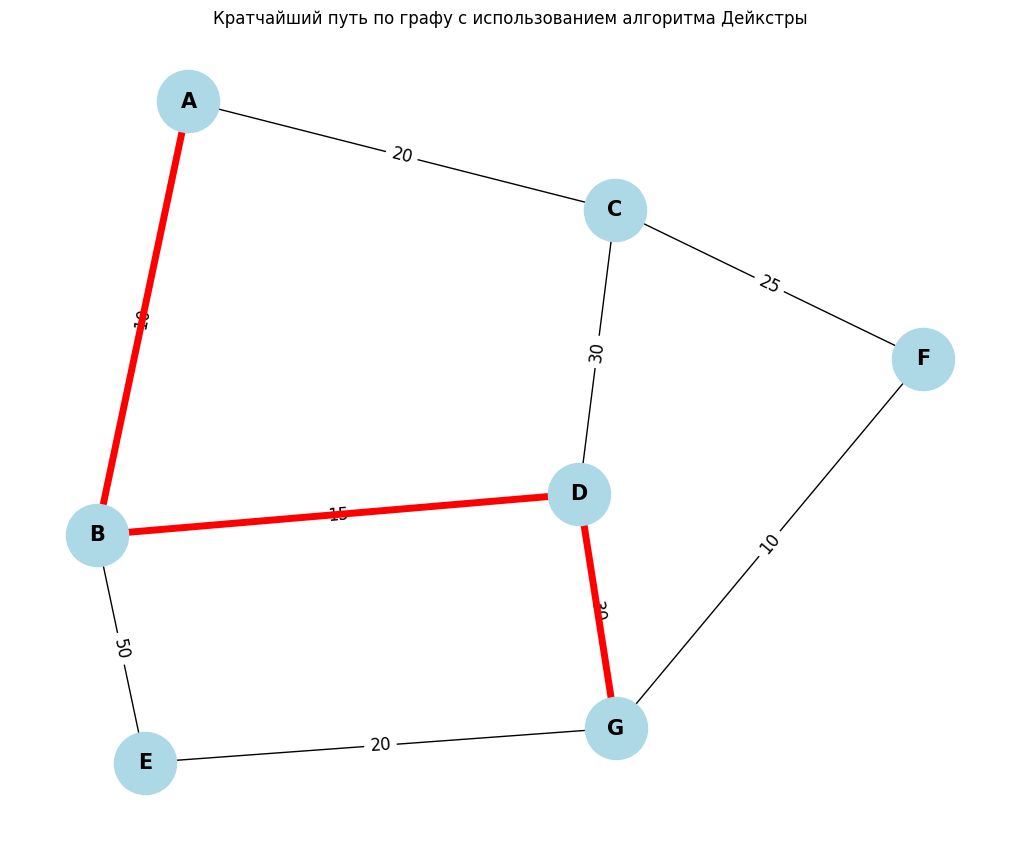

In [ ]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

# Функция для нахождения кратчайшего пути с использованием алгоритма Дейкстры
def dijkstra(graph, start, end):
    queue = [(0, start)]
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous_nodes = {node: None for node in graph}

    while queue:
        current_distance, current_node = heapq.heappop(queue)

        if current_distance > distances[current_node]:
            continue

        for neighbor, weight in graph.get(current_node, {}).items():
            distance = current_distance + weight

            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_node
                heapq.heappush(queue, (distance, neighbor))

    # Построение пути от end до start
    path, current_node = [], end
    while current_node:
        path.append(current_node)
        current_node = previous_nodes[current_node]
    path = path[::-1]  # Переворачиваем путь

    return path, distances[end]

# Пример графа
graph = {
    'A': {'B': 10, 'C': 20},
    'B': {'D': 15, 'E': 50},
    'C': {'D': 30, 'F': 25},
    'D': {'G': 30},
    'E': {'G': 20},
    'F': {'G': 10},
    'G': {}
}

start = 'A'
end = 'G'
path, distance = dijkstra(graph, start, end)
print(f"Кратчайший путь: {' -> '.join(path)} с расстоянием {distance} единиц")

# Визуализация графа и кратчайшего пути
G = nx.Graph()

# Добавляем узлы и ребра в граф
for node, neighbors in graph.items():
    for neighbor, weight in neighbors.items():
        G.add_edge(node, neighbor, weight=weight)

# Позиции узлов на графе (можно настроить)
pos = nx.spring_layout(G)

# Отрисовка графа
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=15, font_weight='bold')

# Отрисовка ребер с весами
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

# Подсветка кратчайшего пути
path_edges = list(zip(path, path[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=5)

# Показываем граф
plt.title('Кратчайший путь по графу с использованием алгоритма Дейкстры')
plt.show()


Кратчайший путь: A -> C -> G -> K -> N -> P с расстоянием 50 единиц


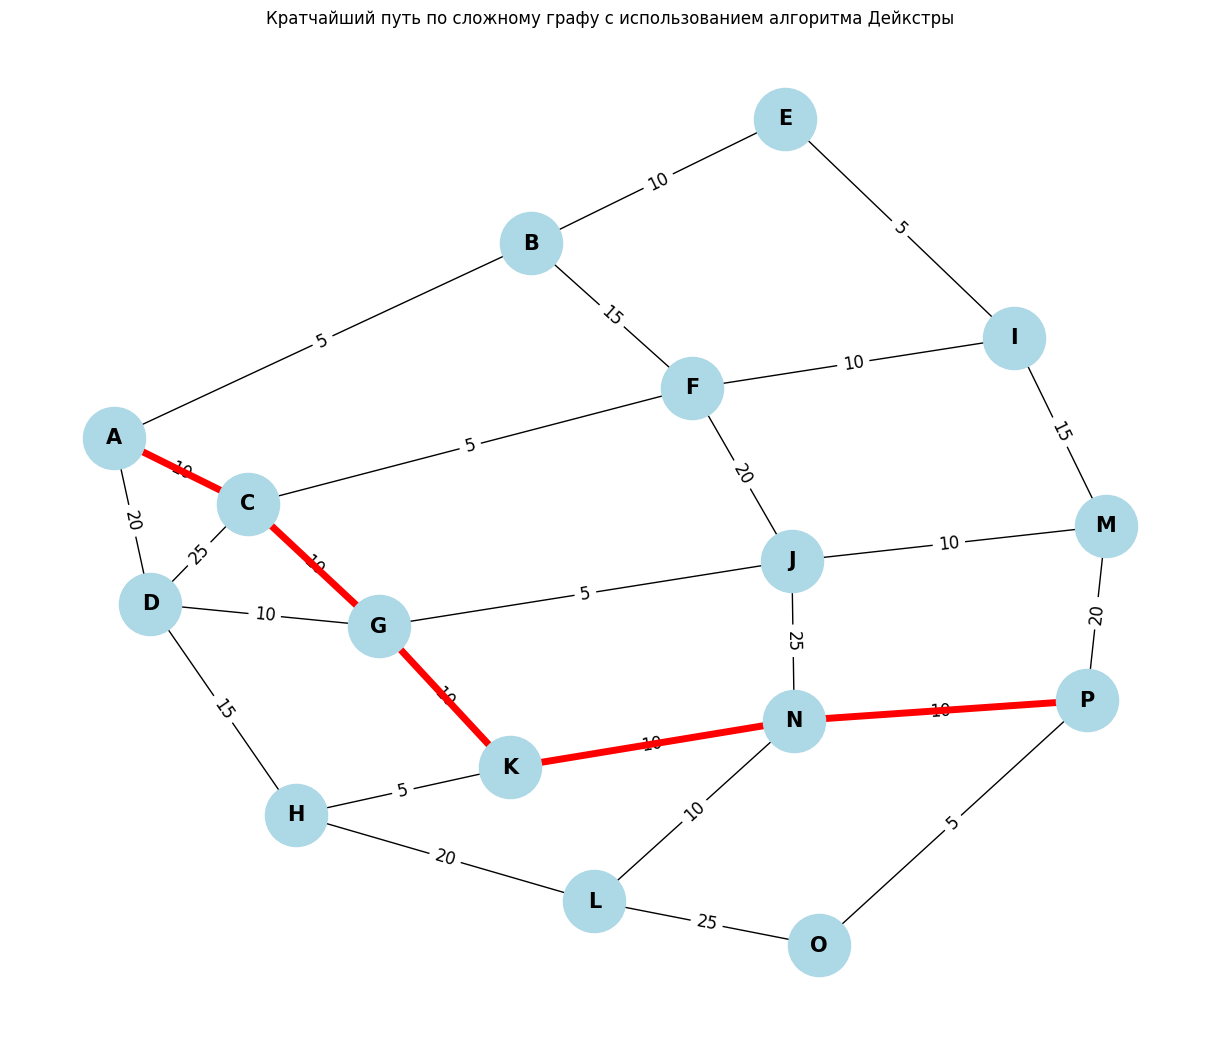

In [ ]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

# Функция для нахождения кратчайшего пути с использованием алгоритма Дейкстры
def dijkstra(graph, start, end):
    queue = [(0, start)]
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous_nodes = {node: None for node in graph}

    while queue:
        current_distance, current_node = heapq.heappop(queue)

        if current_distance > distances[current_node]:
            continue

        for neighbor, weight in graph.get(current_node, {}).items():
            distance = current_distance + weight

            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_node
                heapq.heappush(queue, (distance, neighbor))

    # Построение пути от end до start
    path, current_node = [], end
    while current_node:
        path.append(current_node)
        current_node = previous_nodes[current_node]
    path = path[::-1]  # Переворачиваем путь

    return path, distances[end]

# Усложненный граф с большим количеством точек и ребер
graph = {
    'A': {'B': 5, 'C': 10, 'D': 20},
    'B': {'E': 10, 'F': 15},
    'C': {'F': 5, 'G': 10, 'D': 25},
    'D': {'G': 10, 'H': 15},
    'E': {'I': 5},
    'F': {'I': 10, 'J': 20},
    'G': {'J': 5, 'K': 10},
    'H': {'K': 5, 'L': 20},
    'I': {'M': 15},
    'J': {'M': 10, 'N': 25},
    'K': {'N': 10},
    'L': {'N': 10, 'O': 25},
    'M': {'P': 20},
    'N': {'P': 10},
    'O': {'P': 5},
    'P': {}
}

start = 'A'
end = 'P'
path, distance = dijkstra(graph, start, end)
print(f"Кратчайший путь: {' -> '.join(path)} с расстоянием {distance} единиц")

# Визуализация графа и кратчайшего пути
G = nx.Graph()

# Добавляем узлы и ребра в граф
for node, neighbors in graph.items():
    for neighbor, weight in neighbors.items():
        G.add_edge(node, neighbor, weight=weight)

# Позиции узлов на графе (можно настроить)
pos = nx.spring_layout(G, seed=42)

# Отрисовка графа
plt.figure(figsize=(12, 10))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=15, font_weight='bold')

# Отрисовка ребер с весами
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

# Подсветка кратчайшего пути
path_edges = list(zip(path, path[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=5)

# Показываем граф
plt.title('Кратчайший путь по сложному графу с использованием алгоритма Дейкстры')
plt.show()


Кратчайший путь: ПОРТ 1 -> B -> F -> O -> AA -> AM -> AZ -> BL -> BX -> CK -> CX -> DJ -> DV -> EH -> ET -> FF -> FR -> GD -> GP -> HB -> HN -> HZ -> IL -> IX -> JJ -> JV -> KH -> KT -> LF -> LR -> MD -> MQ -> ПОРТ 2 с расстоянием 560 единиц


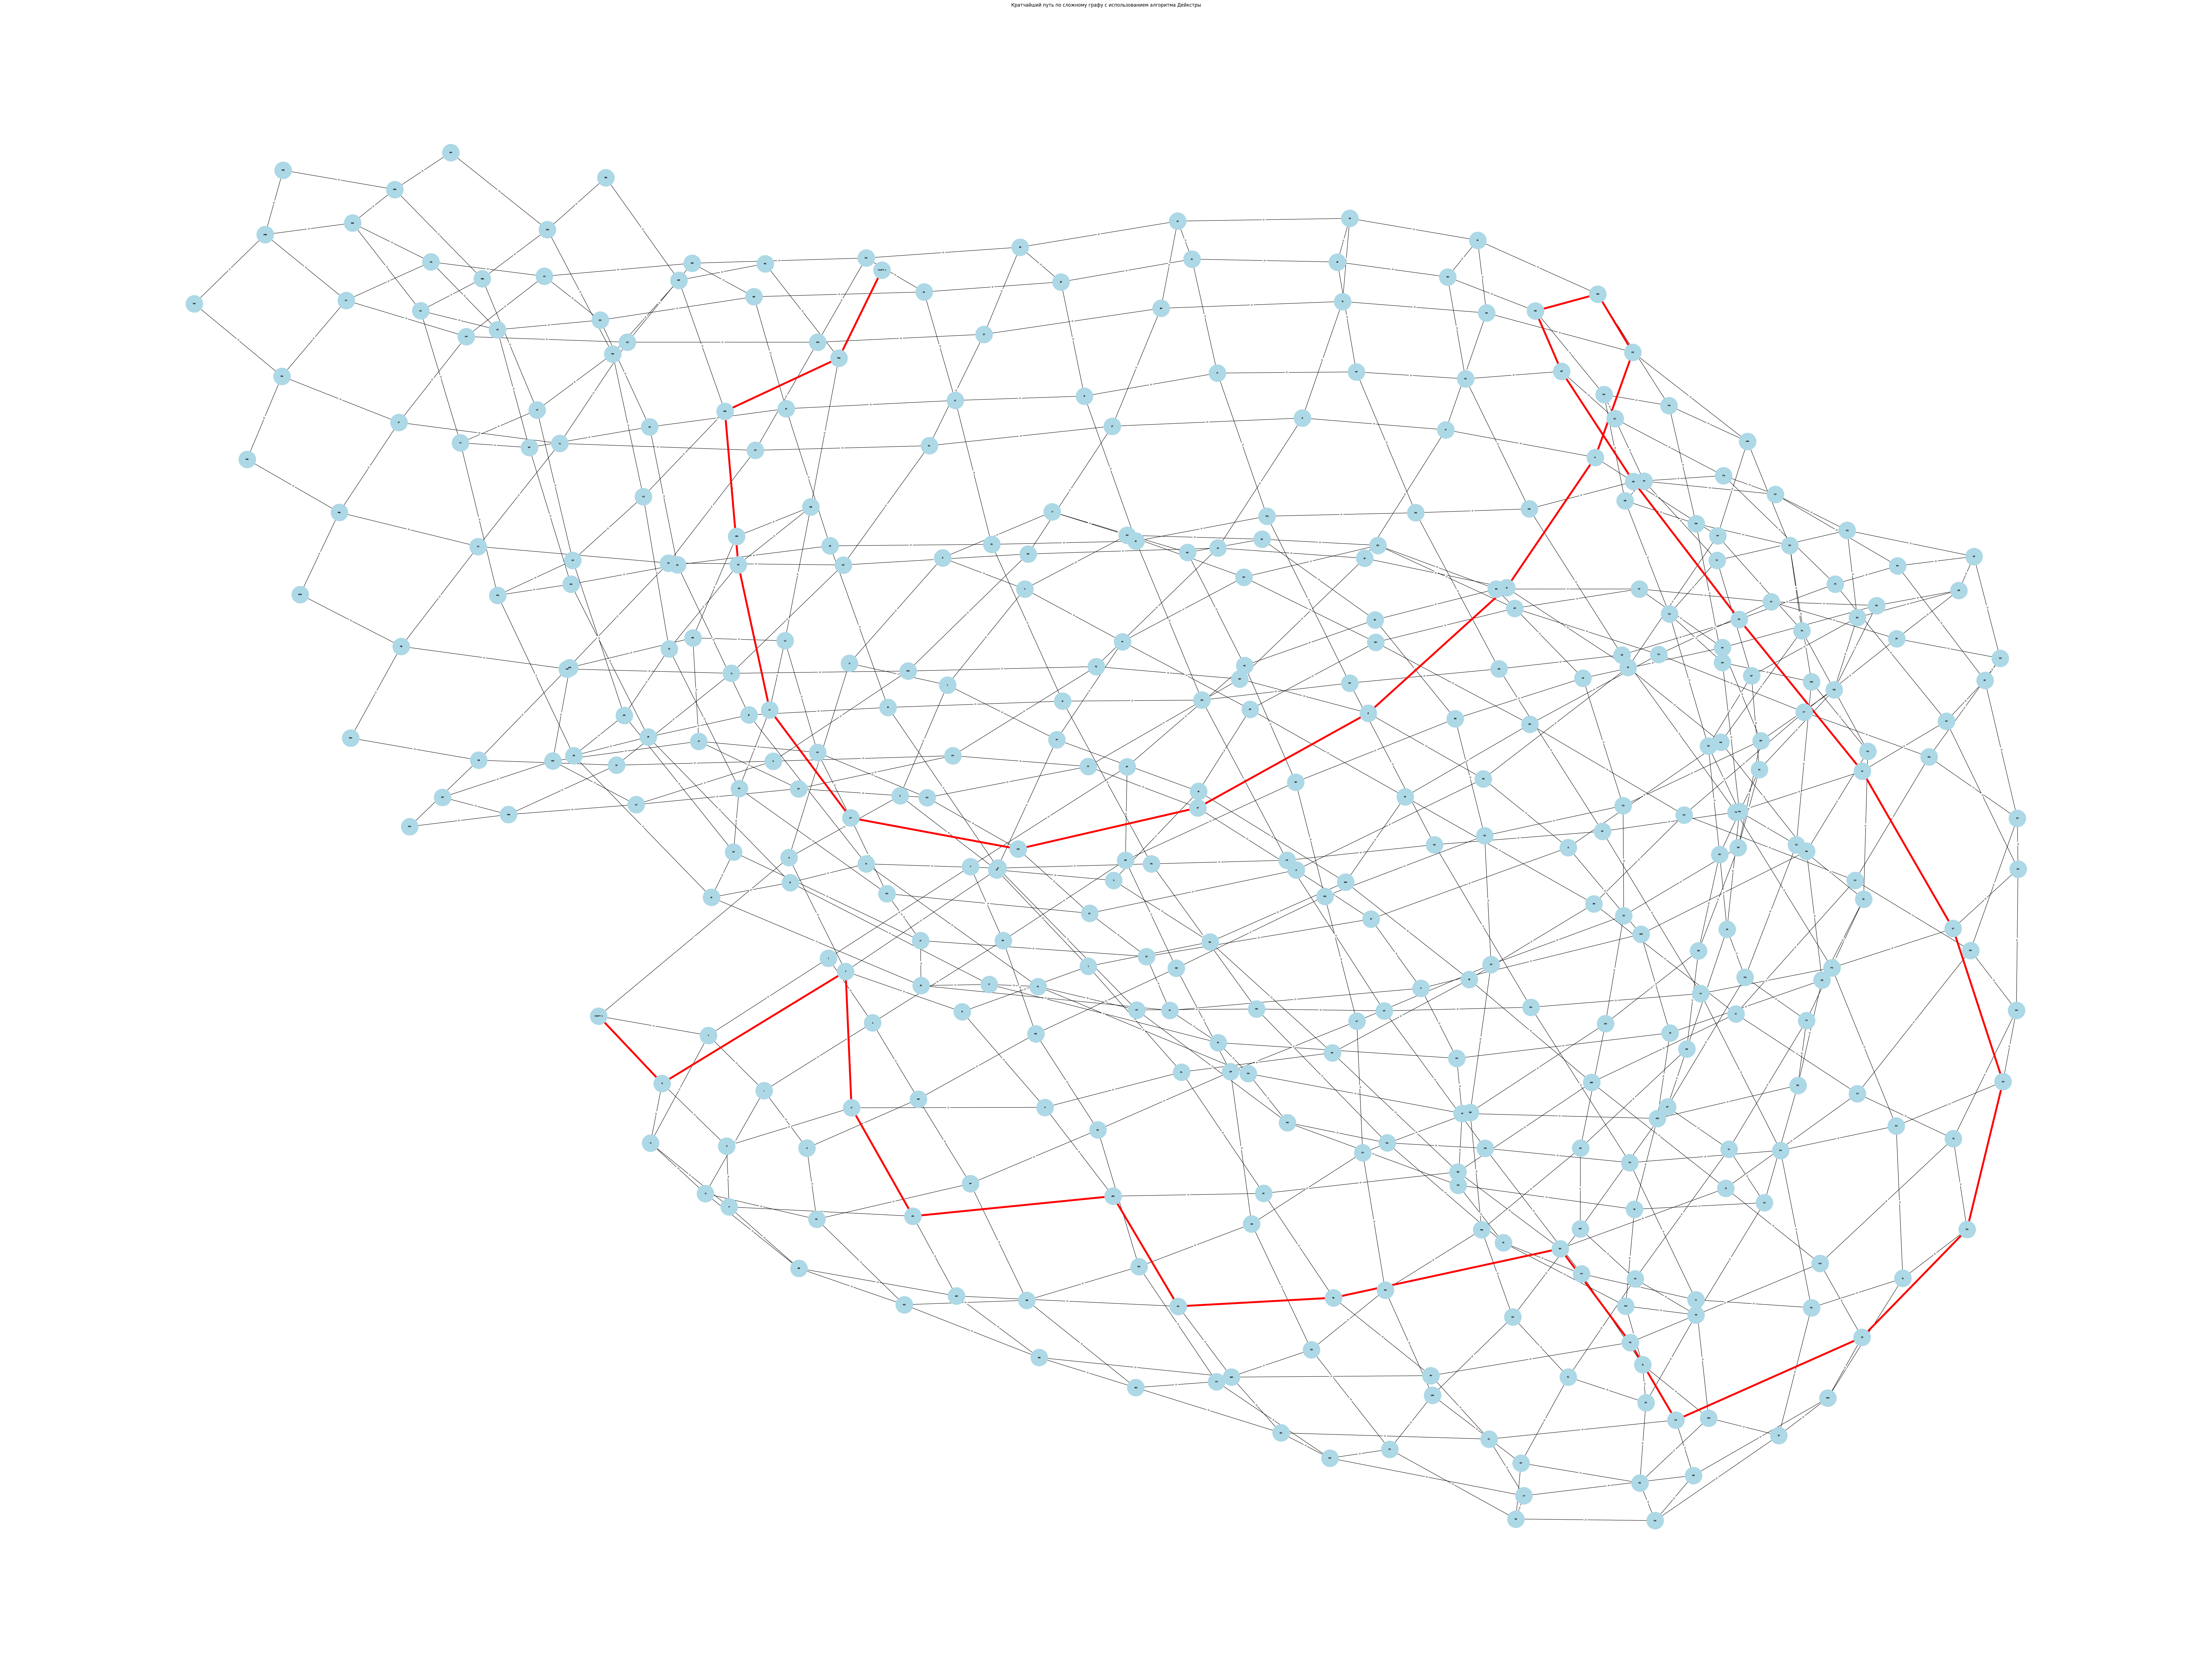

In [1]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

# Функция для нахождения кратчайшего пути с использованием алгоритма Дейкстры
def dijkstra(graph, start, end):
    queue = [(0, start)]
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous_nodes = {node: None for node in graph}

    while queue:
        current_distance, current_node = heapq.heappop(queue)

        if current_distance > distances[current_node]:
            continue

        for neighbor, weight in graph.get(current_node, {}).items():
            distance = current_distance + weight

            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_node
                heapq.heappush(queue, (distance, neighbor))

    # Построение пути от end до start
    path, current_node = [], end
    while current_node:
        path.append(current_node)
        current_node = previous_nodes[current_node]
    path = path[::-1]  # Переворачиваем путь

    return path, distances[end]

# Очень сложный граф
graph = {
    'ПОРТ 1': {'A': 5, 'B': 10, 'C': 15},
    'A': {'D': 10, 'E': 20, 'F': 25},
    'B': {'F': 10, 'G': 20, 'H': 25},
    'C': {'H': 15, 'I': 25, 'J': 30},
    'D': {'K': 20, 'L': 15},
    'E': {'L': 25, 'M': 30},
    'F': {'M': 15, 'N': 35, 'O': 20},
    'G': {'O': 30, 'P': 40},
    'H': {'P': 20, 'Q': 30},
    'I': {'Q': 15, 'R': 25, 'S': 35},
    'J': {'S': 20, 'T': 30},
    'K': {'U': 25, 'V': 35},
    'L': {'V': 20, 'W': 25},
    'M': {'W': 15, 'X': 30, 'Y': 35},
    'N': {'Y': 20, 'Z': 25},
    'O': {'Z': 15, 'AA': 20},
    'P': {'AA': 10, 'AB': 30},
    'Q': {'AB': 15, 'AC': 25},
    'R': {'AC': 20, 'AD': 30},
    'S': {'AD': 25, 'AE': 35},
    'T': {'AE': 15, 'AF': 20},
    'U': {'AG': 20, 'AH': 25},
    'V': {'AH': 30, 'AI': 35},
    'W': {'AI': 20, 'AJ': 25},
    'X': {'AJ': 15, 'AK': 30},
    'Y': {'AK': 20, 'AL': 35},
    'Z': {'AL': 25, 'AM': 40},
    'AA': {'AM': 15, 'AN': 30},
    'AB': {'AN': 20, 'AO': 25},
    'AC': {'AO': 15, 'AP': 20},
    'AD': {'AP': 30, 'AQ': 35},
    'AE': {'AQ': 25, 'AR': 40},
    'AF': {'AR': 20, 'АС': 30},
    'AG': {'АС': 25, 'AT': 35},
    'AH': {'AT': 20, 'AU': 40},
    'AI': {'AU': 15, 'AV': 35},
    'AJ': {'AV': 30, 'AW': 25},
    'AK': {'AW': 20, 'AX': 15},
    'AL': {'AX': 30, 'AY': 25},
    'AM': {'AY': 35, 'AZ': 20},
    'AN': {'AZ': 15, 'BA': 25},
    'AO': {'BA': 20, 'BB': 30},
    'AP': {'BB': 25, 'BC': 35},
    'AQ': {'BC': 20, 'BD': 30},
    'AR': {'BD': 15, 'BE': 20},
    'АС': {'BE': 25, 'BF': 35},
    'AT': {'BF': 20, 'BG': 30},
    'AU': {'BG': 15, 'BH': 35},
    'AV': {'BH': 20, 'BI': 25},
    'AW': {'BI': 30, 'BJ': 40},
    'AX': {'BJ': 25, 'BK': 15},
    'AY': {'BK': 20, 'BL': 25},
    'AZ': {'BL': 35, 'BM': 30},
    'BA': {'BM': 20, 'BN': 15},
    'BB': {'BN': 30, 'BO': 25},
    'BC': {'BO': 20, 'BP': 35},
    'BD': {'BP': 15, 'BQ': 25},
    'BE': {'BQ': 30, 'BR': 20},
    'BF': {'BR': 25, 'BS': 35},
    'BG': {'BS': 20, 'BT': 15},
    'BH': {'BT': 30, 'BU': 25},
    'BI': {'BU': 20, 'BV': 15},
    'BJ': {'BV': 25, 'BW': 30},
    'BK': {'BW': 20, 'BX': 35},
    'BL': {'BX': 15, 'BY': 30},
    'BM': {'BY': 25, 'BZ': 20},
    'BN': {'BZ': 35, 'CA': 25},
    'BO': {'CA': 20, 'CB': 30},
    'BP': {'CB': 15, 'CC': 35},
    'BQ': {'CC': 25, 'CD': 20},
    'BR': {'CD': 30, 'CE': 35},
    'BS': {'CE': 20, 'CF': 25},
    'BT': {'CF': 15, 'CG': 30},
    'BU': {'CG': 20, 'CH': 25},
    'BV': {'CH': 35, 'CI': 20},
    'BW': {'CI': 25, 'CJ': 15},
    'BX': {'CJ': 30, 'CK': 20},
    'BY': {'CK': 25, 'CL': 35},
    'BZ': {'CL': 20, 'CM': 25},
    'CA': {'CM': 35, 'CN': 15},
    'CB': {'CN': 20, 'CO': 25},
    'CC': {'CO': 30, 'CP': 35},
    'CD': {'CP': 20, 'CQ': 25},
    'CE': {'CQ': 15, 'CR': 30},
    'CF': {'CR': 20, 'CS': 35},
    'CG': {'CS': 25, 'CT': 30},
    'CH': {'CT': 20, 'CU': 25},
    'CI': {'CU': 15, 'CV': 30},
    'CJ': {'CV': 25, 'CW': 35},
    'CK': {'CW': 20, 'CX': 15},
    'CL': {'CX': 30, 'CY': 25},
    'CM': {'CY': 20, 'CZ': 15},
    'CN': {'CZ': 25, 'DA': 30},
    'CO': {'DA': 20, 'DB': 35},
    'CP': {'DB': 15, 'DC': 25},
    'CQ': {'DC': 30, 'DD': 20},
    'CR': {'DD': 25, 'DE': 15},
    'CS': {'DE': 20, 'DF': 25},
    'CT': {'DF': 30, 'DG': 35},
    'CU': {'DG': 20, 'DH': 25},
    'CV': {'DH': 15, 'DI': 30},
    'CW': {'DI': 25, 'DJ': 35},
    'CX': {'DJ': 20, 'DK': 15},
    'CY': {'DK': 30, 'DL': 25},
    'CZ': {'DL': 20, 'DM': 35},
    'DA': {'DM': 25, 'DN': 30},
    'DB': {'DN': 20, 'DO': 15},
    'DC': {'DO': 35, 'DP': 25},
    'DD': {'DP': 20, 'DQ': 30},
    'DE': {'DQ': 15, 'DR': 25},
    'DF': {'DR': 30, 'DS': 20},
    'DG': {'DS': 25, 'DT': 15},
    'DH': {'DT': 20, 'DU': 35},
    'DI': {'DU': 30, 'DV': 20},
    'DJ': {'DV': 25, 'DW': 15},
    'DK': {'DW': 30, 'DX': 20},
    'DL': {'DX': 25, 'DY': 35},
    'DM': {'DY': 20, 'DZ': 25},
    'DN': {'DZ': 30, 'EA': 35},
    'DO': {'EA': 20, 'EB': 25},
    'DP': {'EB': 15, 'EC': 30},
    'DQ': {'EC': 25, 'ED': 35},
    'DR': {'ED': 20, 'EE': 25},
    'DS': {'EE': 15, 'EF': 30},
    'DT': {'EF': 20, 'EG': 35},
    'DU': {'EG': 25, 'EH': 20},
    'DV': {'EH': 15, 'EI': 25},
    'DW': {'EI': 30, 'EJ': 35},
    'DX': {'EJ': 20, 'EK': 25},
    'DY': {'EK': 15, 'EL': 30},
    'DZ': {'EL': 25, 'EM': 35},
    'EA': {'EM': 20, 'EN': 25},
    'EB': {'EN': 15, 'EO': 30},
    'EC': {'EO': 25, 'EP': 35},
    'ED': {'EP': 20, 'EQ': 25},
    'EE': {'EQ': 15, 'ER': 30},
    'EF': {'ER': 25, 'ES': 35},
    'EG': {'ES': 20, 'ET': 25},
    'EH': {'ET': 15, 'EU': 30},
    'EI': {'EU': 25, 'EV': 35},
    'EJ': {'EV': 20, 'EW': 25},
    'EK': {'EW': 15, 'EX': 30},
    'EL': {'EX': 25, 'EY': 35},
    'EM': {'EY': 20, 'EZ': 25},
    'EN': {'EZ': 15, 'FA': 30},
    'EO': {'FA': 25, 'FB': 35},
    'EP': {'FB': 20, 'FC': 25},
    'EQ': {'FC': 15, 'FD': 30},
    'ER': {'FD': 25, 'FE': 35},
    'ES': {'FE': 20, 'FF': 25},
    'ET': {'FF': 15, 'FG': 30},
    'EU': {'FG': 25, 'FH': 35},
    'EV': {'FH': 20, 'FI': 25},
    'EW': {'FI': 15, 'FJ': 30},
    'EX': {'FJ': 25, 'FK': 35},
    'EY': {'FK': 20, 'FL': 25},
    'EZ': {'FL': 15, 'FM': 30},
    'FA': {'FM': 25, 'FN': 35},
    'FB': {'FN': 20, 'FO': 25},
    'FC': {'FO': 15, 'FP': 30},
    'FD': {'FP': 25, 'FQ': 35},
    'FE': {'FQ': 20, 'FR': 25},
    'FF': {'FR': 15, 'FS': 30},
    'FG': {'FS': 25, 'FT': 35},
    'FH': {'FT': 20, 'FU': 25},
    'FI': {'FU': 15, 'FV': 30},
    'FJ': {'FV': 25, 'FW': 35},
    'FK': {'FW': 20, 'FX': 25},
    'FL': {'FX': 15, 'FY': 30},
    'FM': {'FY': 25, 'FZ': 35},
    'FN': {'FZ': 20, 'GA': 25},
    'FO': {'GA': 15, 'GB': 30},
    'FP': {'GB': 25, 'GC': 35},
    'FQ': {'GC': 20, 'GD': 25},
    'FR': {'GD': 15, 'GE': 30},
    'FS': {'GE': 25, 'GF': 35},
    'FT': {'GF': 20, 'GG': 25},
    'FU': {'GG': 15, 'GH': 30},
    'FV': {'GH': 25, 'GI': 35},
    'FW': {'GI': 20, 'GJ': 25},
    'FX': {'GJ': 15, 'GK': 30},
    'FY': {'GK': 25, 'GL': 35},
    'FZ': {'GL': 20, 'GM': 25},
    'GA': {'GM': 15, 'GN': 30},
    'GB': {'GN': 25, 'GO': 35},
    'GC': {'GO': 20, 'GP': 25},
    'GD': {'GP': 15, 'GQ': 30},
    'GE': {'GQ': 25, 'GR': 35},
    'GF': {'GR': 20, 'GS': 25},
    'GG': {'GS': 15, 'GT': 30},
    'GH': {'GT': 25, 'GU': 35},
    'GI': {'GU': 20, 'GV': 25},
    'GJ': {'GV': 15, 'GW': 30},
    'GK': {'GW': 25, 'GX': 35},
    'GL': {'GX': 20, 'GY': 25},
    'GM': {'GY': 15, 'GZ': 30},
    'GN': {'GZ': 25, 'HA': 35},
    'GO': {'HA': 20, 'HB': 25},
    'GP': {'HB': 15, 'HC': 30},
    'GQ': {'HC': 25, 'HD': 35},
    'GR': {'HD': 20, 'HE': 25},
    'GS': {'HE': 15, 'HF': 30},
    'GT': {'HF': 25, 'HG': 35},
    'GU': {'HG': 20, 'HH': 25},
    'GV': {'HH': 15, 'HI': 30},
    'GW': {'HI': 25, 'HJ': 35},
    'GX': {'HJ': 20, 'HK': 25},
    'GY': {'HK': 15, 'HL': 30},
    'GZ': {'HL': 25, 'HM': 35},
    'HA': {'HM': 20, 'HN': 25},
    'HB': {'HN': 15, 'HO': 30},
    'HC': {'HO': 25, 'HP': 35},
    'HD': {'HP': 20, 'HQ': 25},
    'HE': {'HQ': 15, 'HR': 30},
    'HF': {'HR': 25, 'HS': 35},
    'HG': {'HS': 20, 'HT': 25},
    'HH': {'HT': 15, 'HU': 30},
    'HI': {'HU': 25, 'HV': 35},
    'HJ': {'HV': 20, 'HW': 25},
    'HK': {'HW': 15, 'HX': 30},
    'HL': {'HX': 25, 'HY': 35},
    'HM': {'HY': 20, 'HZ': 25},
    'HN': {'HZ': 15, 'IA': 30},
    'HO': {'IA': 25, 'IB': 35},
    'HP': {'IB': 20, 'IC': 25},
    'HQ': {'IC': 15, 'ID': 30},
    'HR': {'ID': 25, 'IE': 35},
    'HS': {'IE': 20, 'IF': 25},
    'HT': {'IF': 15, 'IG': 30},
    'HU': {'IG': 25, 'IH': 35},
    'HV': {'IH': 20, 'II': 25},
    'HW': {'II': 15, 'IJ': 30},
    'HX': {'IJ': 25, 'IK': 35},
    'HY': {'IK': 20, 'IL': 25},
    'HZ': {'IL': 15, 'IM': 30},
    'IA': {'IM': 25, 'IN': 35},
    'IB': {'IN': 20, 'IO': 25},
    'IC': {'IO': 15, 'IP': 30},
    'ID': {'IP': 25, 'IQ': 35},
    'IE': {'IQ': 20, 'IR': 25},
    'IF': {'IR': 15, 'IS': 30},
    'IG': {'IS': 25, 'IT': 35},
    'IH': {'IT': 20, 'IU': 25},
    'II': {'IU': 15, 'IV': 30},
    'IJ': {'IV': 25, 'IW': 35},
    'IK': {'IW': 20, 'IX': 25},
    'IL': {'IX': 15, 'IY': 30},
    'IM': {'IY': 25, 'IZ': 35},
    'IN': {'IZ': 20, 'JA': 25},
    'IO': {'JA': 15, 'JB': 30},
    'IP': {'JB': 25, 'JC': 35},
    'IQ': {'JC': 20, 'JD': 25},
    'IR': {'JD': 15, 'JE': 30},
    'IS': {'JE': 25, 'JF': 35},
    'IT': {'JF': 20, 'JG': 25},
    'IU': {'JG': 15, 'JH': 30},
    'IV': {'JH': 25, 'JI': 35},
    'IW': {'JI': 20, 'JJ': 25},
    'IX': {'JJ': 15, 'JK': 30},
    'IY': {'JK': 25, 'JL': 35},
    'IZ': {'JL': 20, 'JM': 25},
    'JA': {'JM': 15, 'JN': 30},
    'JB': {'JN': 25, 'JO': 35},
    'JC': {'JO': 20, 'JP': 25},
    'JD': {'JP': 15, 'JQ': 30},
    'JE': {'JQ': 25, 'JR': 35},
    'JF': {'JR': 20, 'JS': 25},
    'JG': {'JS': 15, 'JT': 30},
    'JH': {'JT': 25, 'JU': 35},
    'JI': {'JU': 20, 'JV': 25},
    'JJ': {'JV': 15, 'JW': 30},
    'JK': {'JW': 25, 'JX': 35},
    'JL': {'JX': 20, 'JY': 25},
    'JM': {'JY': 15, 'JZ': 30},
    'JN': {'JZ': 25, 'KA': 35},
    'JO': {'KA': 20, 'KB': 25},
    'JP': {'KB': 15, 'KC': 30},
    'JQ': {'KC': 25, 'KD': 35},
    'JR': {'KD': 20, 'KE': 25},
    'JS': {'KE': 15, 'KF': 30},
    'JT': {'KF': 25, 'KG': 35},
    'JU': {'KG': 20, 'KH': 25},
    'JV': {'KH': 15, 'KI': 30},
    'JW': {'KI': 25, 'KJ': 35},
    'JX': {'KJ': 20, 'KK': 25},
    'JY': {'KK': 15, 'KL': 30},
    'JZ': {'KL': 25, 'KM': 35},
    'KA': {'KM': 20, 'KN': 25},
    'KB': {'KN': 15, 'KO': 30},
    'KC': {'KO': 25, 'KP': 35},
    'KD': {'KP': 20, 'KQ': 25},
    'KE': {'KQ': 15, 'KR': 30},
    'KF': {'KR': 25, 'KS': 35},
    'KG': {'KS': 20, 'KT': 25},
    'KH': {'KT': 15, 'KU': 30},
    'KI': {'KU': 25, 'KV': 35},
    'KJ': {'KV': 20, 'KW': 25},
    'KK': {'KW': 15, 'KX': 30},
    'KL': {'KX': 25, 'KY': 35},
    'KM': {'KY': 20, 'KZ': 25},
    'KN': {'KZ': 15, 'LA': 30},
    'KO': {'LA': 25, 'LB': 35},
    'KP': {'LB': 20, 'LC': 25},
    'KQ': {'LC': 15, 'LD': 30},
    'KR': {'LD': 25, 'LE': 35},
    'KS': {'LE': 20, 'LF': 25},
    'KT': {'LF': 15, 'LG': 30},
    'KU': {'LG': 25, 'LH': 35},
    'KV': {'LH': 20, 'LI': 25},
    'KW': {'LI': 15, 'LJ': 30},
    'KX': {'LJ': 25, 'LK': 35},
    'KY': {'LK': 20, 'LL': 25},
    'KZ': {'LL': 15, 'LM': 30},
    'LA': {'LM': 25, 'LN': 35},
    'LB': {'LN': 20, 'LO': 25},
    'LC': {'LO': 15, 'LP': 30},
    'LD': {'LP': 25, 'LQ': 35},
    'LE': {'LQ': 20, 'LR': 25},
    'LF': {'LR': 15, 'LS': 30},
    'LG': {'LS': 25, 'LT': 35},
    'LH': {'LT': 20, 'LU': 25},
    'LI': {'LU': 15, 'LV': 30},
    'LJ': {'LV': 25, 'LW': 35},
    'LK': {'LW': 20, 'LX': 25},
    'LL': {'LX': 15, 'LY': 30},
    'LM': {'LY': 25, 'LZ': 35},
    'LN': {'LZ': 20, 'MA': 25},
    'LO': {'MA': 15, 'MB': 30},
    'LP': {'MB': 25, 'MC': 35},
    'LQ': {'MC': 20, 'MD': 25},
    'LR': {'MD': 15, 'ME': 30},
    'LS': {'ME': 25, 'MF': 35},
    'LT': {'MF': 20, 'MG': 25},
    'LU': {'MG': 15, 'MH': 30},
    'LV': {'MH': 25, 'MI': 35},
    'LW': {'MI': 20, 'MJ': 25},
    'LX': {'MJ': 15, 'MK': 30},
    'LY': {'MK': 25, 'ML': 35},
    'LZ': {'ML': 20, 'MM': 25},
    'MA': {'MM': 15, 'MN': 30},
    'MB': {'MN': 25, 'MO': 35},
    'MC': {'MO': 20, 'MP': 25},
    'MD': {'MP': 15, 'MQ': 30},
    'ME': {'MQ': 25, 'MR': 35},
    'MF': {'MR': 20, 'MS': 25},
    'MG': {'MS': 15, 'MT': 30},
    'MH': {'MT': 25, 'MU': 35},
    'MI': {'MU': 20, 'MV': 25},
    'MJ': {'MV': 15, 'MW': 30},
    'MK': {'MW': 25, 'MX': 35},
    'ML': {'MX': 20, 'MY': 25},
    'MM': {'MY': 15, 'MZ': 30},
    'MN': {'MZ': 25, 'NA': 35},
    'MO': {'NA': 20, 'NB': 25},
    'MP': {'NB': 15, 'NC': 30},
    'MQ': {'NC': 25, 'ПОРТ 2': 35},
    'MR': {},
    'MS': {},
    'MT': {},
    'MU': {},
    'MV': {},
    'MW': {},
    'MX': {},
    'MY': {},
    'MZ': {},
    'NA': {},
    'NB': {},
    'NC': {},
    'ПОРТ 2': {}
}

start = 'ПОРТ 1'
end = 'ПОРТ 2'
path, distance = dijkstra(graph, start, end)
print(f"Кратчайший путь: {' -> '.join(path)} с расстоянием {distance} единиц")

# Визуализация графа и кратчайшего пути
G = nx.Graph()

# Добавляем узлы и ребра в граф
for node, neighbors in graph.items():
    for neighbor, weight in neighbors.items():
        G.add_edge(node, neighbor, weight=weight)

# Позиции узлов на графе (можно настроить)
pos = nx.spring_layout(G, seed=42)

# Отрисовка графа
plt.figure(figsize=(80, 60))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=5, font_weight='bold')

# Отрисовка ребер с весами
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=5)

# Подсветка кратчайшего пути
path_edges = list(zip(path, path[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=5)

# Показываем граф
plt.title('Кратчайший путь по сложному графу с использованием алгоритма Дейкстры')
plt.show()

<ipython-input-8-0bbc8f8f01ce>:48: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


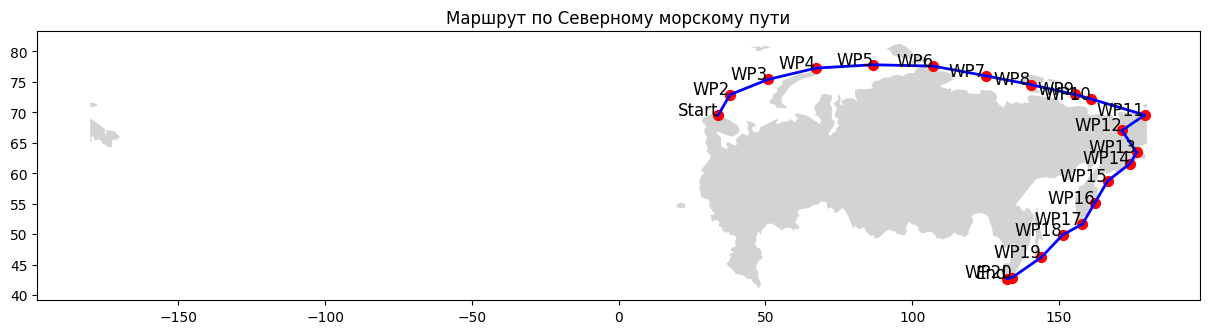

Общее расстояние по маршруту: 5128.68 морских миль


In [ ]:
import math
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

# Функция для расчета расстояния между двумя точками с использованием формулы Хаверсина
def haversine(coord1, coord2):
    R = 6371  # Радиус Земли в километрах
    lat1, lon1 = coord1
    lat2, lon2 = coord2

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = math.sin(dlat / 2) ** 2 + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return R * c

# Координаты маршрута в заданном порядке
ordered_waypoints = [
    (69.4759 , 33.8392),  # Start
    (72.902, 37.9952),   # WP2
    (75.3789, 50.886),   # WP3
    (77.246, 67.2054),   # WP4
    (77.7975, 86.7348),  # WP5
    (77.5744, 107.258),  # WP6
    (75.9861, 124.996),  # WP7
    (74.5341, 140.406),  # WP8
    (72.9186, 155.346),  # WP9
    (72.1738 , 161.009),  # WP10
    (69.5511, 179.212),  # WP11
    (67.0122, 171.465), # WP12
    (63.4113, 176.497), # WP13
    (61.5888, 174.248),  # WP14
    (58.7339, 166.598),  # WP15
    (55.1578, 162.243),  # WP16
    (51.6572, 158.019),  # WP17
    (49.8675, 151.237),  # WP18
    (46.2073, 144.015),  # WP19
    (42.884, 134.085),   # WP20
    (42.6965, 132.314)   # End
]

# Создаем DataFrame с координатами
df = pd.DataFrame(ordered_waypoints, columns=['Latitude', 'Longitude'])
df['Waypoint'] = ['Start'] + [f'WP{i+1}' for i in range(1, len(ordered_waypoints) - 1)] + ['End']

# Загрузка карты мира
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Фильтрация по России
russia = world[world.name == 'Russia']

# Создаем фигуру
fig, ax = plt.subplots(figsize=(15, 10))

# Рисуем карту России
russia.plot(ax=ax, color='lightgray')

# Добавляем точки маршрута
ax.scatter(df['Longitude'], df['Latitude'], color='red', s=50)

# Соединяем точки маршрута
ax.plot(df['Longitude'], df['Latitude'], color='blue', linewidth=2)

# Подписываем точки
for i, row in df.iterrows():
    ax.text(row['Longitude'], row['Latitude'], row['Waypoint'], fontsize=12, ha='right')

# Добавляем заголовок
plt.title('Маршрут по Северному морскому пути')

# Показываем карту
plt.show()

# Рассчитываем общее расстояние по всему маршруту
total_distance_km = sum(haversine(ordered_waypoints[i], ordered_waypoints[i+1]) for i in range(len(ordered_waypoints) - 1))
total_distance_nautical_miles = total_distance_km / 1.852

print(f"Общее расстояние по маршруту: {total_distance_nautical_miles:.2f} морских миль")


In [ ]:
import math
import heapq

# Функция для расчета расстояния между двумя точками с использованием формулы Хаверсина
def haversine(coord1, coord2):
    R = 6371  # Радиус Земли в километрах
    lat1, lon1 = coord1
    lat2, lon2 = coord2

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = math.sin(dlat / 2) ** 2 + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return R * c

# Перевод километров в морские мили
def km_to_nautical_miles(km):
    return km / 1.852

# Координаты маршрута
waypoints = {
    'Start': (74.2152, 47.9876),
    'WP2': (72.902, 37.9952),
    'WP3': (75.3789, 50.886),
    'WP4': (77.246, 67.2054),
    'WP5': (77.7975, 86.7348),
    'WP6': (77.5744, 107.258),
    'WP7': (75.9861, 124.996),
    'WP8': (74.5341, 140.406),
    'WP9': (72.9186, 155.346),
    'WP10': (71.3076, 167.888),
    'WP11': (69.5511, 179.212),
    'WP12': (67.0122, -171.465),
    'WP13': (63.4113, -176.497),
    'WP14': (61.5888, 174.248),
    'WP15': (58.7339, 166.598),
    'WP16': (55.1578, 162.243),
    'WP17': (51.6572, 158.019),
    'WP18': (49.8675, 151.237),
    'WP19': (46.2073, 144.015),
    'WP20': (42.884, 134.085),
    'End': (42.6965, 132.314),
}

# Построение графа
graph = {}
for wp1 in waypoints:
    graph[wp1] = {}
    for wp2 in waypoints:
        if wp1 != wp2:
            distance = haversine(waypoints[wp1], waypoints[wp2])
            graph[wp1][wp2] = distance

# Алгоритм Дейкстры
def dijkstra(graph, start):
    queue = [(0, start)]
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous_nodes = {node: None for node in graph}

    while queue:
        current_distance, current_node = heapq.heappop(queue)

        if current_distance > distances[current_node]:
            continue

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight

            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_node
                heapq.heappush(queue, (distance, neighbor))

    return distances, previous_nodes

# Поиск оптимального маршрута от стартовой точки до конечной
distances, previous_nodes = dijkstra(graph, 'Start')

# Вывод кратчайшего пути от Start до End
path = []
current_node = 'End'
while current_node:
    path.append(current_node)
    current_node = previous_nodes[current_node]
path = path[::-1]  # Переворачиваем путь

# Переводим общее расстояние в морские мили
total_distance_nautical_miles = km_to_nautical_miles(distances['End'])

print(f"Кратчайший путь от Start до End: {' -> '.join(path)}")
print(f"Общее расстояние: {total_distance_nautical_miles:.2f} морских миль")


Кратчайший путь от Start до End: Start -> End
Общее расстояние: 2867.20 морских миль


<ipython-input-4-3cb9211362d5>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


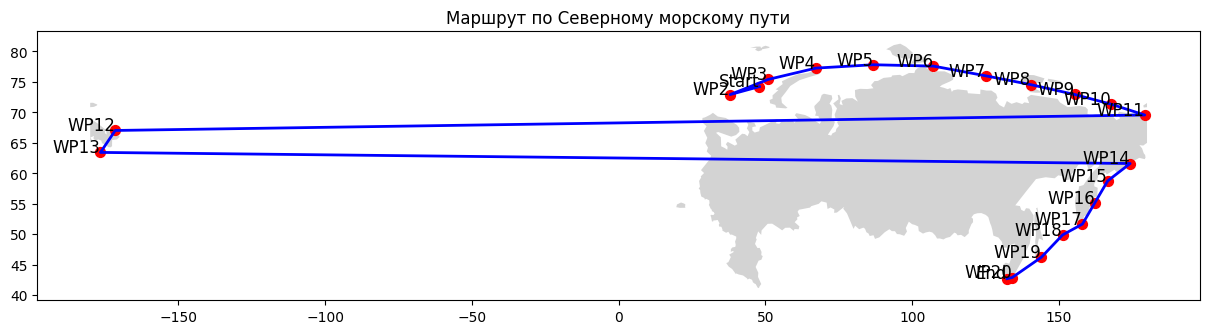

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Загрузка карты мира
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Фильтрация по России
russia = world[world.name == 'Russia']

# Координаты маршрута
waypoints = {
    'Start': (74.2152, 47.9876),
    'WP2': (72.902, 37.9952),
    'WP3': (75.3789, 50.886),
    'WP4': (77.246, 67.2054),
    'WP5': (77.7975, 86.7348),
    'WP6': (77.5744, 107.258),
    'WP7': (75.9861, 124.996),
    'WP8': (74.5341, 140.406),
    'WP9': (72.9186, 155.346),
    'WP10': (71.3076, 167.888),
    'WP11': (69.5511, 179.212),
    'WP12': (67.0122, -171.465),
    'WP13': (63.4113, -176.497),
    'WP14': (61.5888, 174.248),
    'WP15': (58.7339, 166.598),
    'WP16': (55.1578, 162.243),
    'WP17': (51.6572, 158.019),
    'WP18': (49.8675, 151.237),
    'WP19': (46.2073, 144.015),
    'WP20': (42.884, 134.085),
    'End': (42.6965, 132.314),
}

# Создаем DataFrame с координатами
import pandas as pd
df = pd.DataFrame({
    'Waypoint': list(waypoints.keys()),
    'Latitude': [coord[0] for coord in waypoints.values()],
    'Longitude': [coord[1] for coord in waypoints.values()]
})

# Создаем фигуру
fig, ax = plt.subplots(figsize=(15, 10))

# Рисуем карту России
russia.plot(ax=ax, color='lightgray')

# Добавляем точки маршрута
ax.scatter(df['Longitude'], df['Latitude'], color='red', s=50)

# Соединяем точки маршрута
ax.plot(df['Longitude'], df['Latitude'], color='blue', linewidth=2)

# Подписываем точки
for i, row in df.iterrows():
    ax.text(row['Longitude'], row['Latitude'], row['Waypoint'], fontsize=12, ha='right')

# Добавляем заголовок
plt.title('Маршрут по Северному морскому пути')

# Показываем карту
plt.show()
